In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
import math
import copy

In [5]:
def find_neighbours(arr):

    neighbors = []

    for i in range(len(arr)):
        for j, value in enumerate(arr[i]):

            if i == 0 or i == len(arr) - 1 or j == 0 or j == len(arr[i]) - 1:
                # corners
                new_neighbors = []
                if i != 0:
                    new_neighbors.append(arr[i - 1][j])  # top neighbor
                if j != len(arr[i]) - 1:
                    new_neighbors.append(arr[i][j + 1])  # right neighbor
                if i != len(arr) - 1:
                    new_neighbors.append(arr[i + 1][j])  # bottom neighbor
                if j != 0:
                    new_neighbors.append(arr[i][j - 1])  # left neighbor

            else:
                # add neighbors
                new_neighbors = [
                    arr[i - 1][j],  # top neighbor
                    arr[i][j + 1],  # right neighbor
                    arr[i + 1][j],  # bottom neighbor
                    arr[i][j - 1]   # left neighbor
                ]

            neighbors.append({
                value: new_neighbors
                })

    return neighbors


class CreateNodes:
    def __init__(self, food=0, pheromones=0,x_coord=0, y_coord=0,evaporation_rate=1):
        self._food = food
        self._pheromones = pheromones
        self._max_pheromones = 100
        self._evaporation_rate = evaporation_rate
        self._capacity = 0
        self._max_capacity = 20
        self._x_coordinates = x_coord
        self._y_coordinates = y_coord
        self._connected_nodes = None
        self._connected_nodes_backwards = None
        self._connected_nodes_forwards = None
        self._node_number = None

    def create_label(self,label):
        self._node_number = label

    def update_food(self, food):
        self._food += 1

    def increase_food(self):
        self._food += 1

    def decrease_food(self):
        self._food -= 1

    def update_pheromones(self, dropped_pheromones):
        self._pheromones = self._pheromones + dropped_pheromones

    def reset_pheromones(self):
        self._pheromones = 0

    def evaporation(self):
        self._pheromones = self._pheromones - self._pheromones * self._evaporation_rate

    def set_capacity(self):
        self._capacity = 10

    def update_capacity(self, new_capacity):
        self._capacity = self._capacity + new_capacity

    def increase_capacity(self):
        self._capacity = self._capacity + 1

    def reduce_capacity(self):
        self._capacity = self._capacity - 1

    def update_max_capacity(self, max_capacity):
        self._max_capacity = max_capacity

    def update_x_coordinates(self, x_coord):
        self._x_coordinates = x_coord

    def update_y_coordinates(self, y_coord):
        self._y_coordinates = y_coord

    def update_connected_nodes(self, connected_nodes):
        self._connected_nodes = connected_nodes

    def update_connected_nodes_backwards(self):
        self._connected_nodes_backwards = [node for node in self._connected_nodes if node < self._node_number]

    def update_connected_nodes_forwards(self):
        self._connected_nodes_forwards = [node for node in self._connected_nodes if node > self._node_number]

    def get_label(self):
        return self._node_number

    def get_food(self):
        return self._food

    def get_pheromones(self):
        return self._pheromones

    def get_capacity(self):
        return self._capacity

    def get_x_coordinates(self):
        return self._x_coordinates

    def get_y_coordinates(self):
        return self._y_coordinates

    def get_node_number(self):
        return self._node_number

    def get_connected_nodes(self):
        return self._connected_nodes

    def get_connected_nodes_backwards(self):
        return self._connected_nodes_backwards
    
    def get_connected_nodes_forwards(self):
        return self._connected_nodes_forwards

    def get_max_capacity(self):
        return self._max_capacity

In [6]:
# create nodes for the experiment
def create_nodes(n,evaporation_rate):
    nodes = {}


    population = [0,1,2,10] # w/ 0,0 there is no food
    weights = [0.5,0.1,0.1,0.01]

    ys = []

    for i in range(0,int(math.sqrt(n))):
        for j in range(0,int(math.sqrt(n))):
            ys.append(j)

    ys = sorted(ys)

    
    nodes = {}
    node_labels = list(range(n))

    for i in range(n):
        # if i < n/2:
        #     food = 0
        # else:
        #     food = random.choices(population, weights=weights)[0]
        food = random.choices(population, weights=weights)[0]
        nodes[i] = CreateNodes(food=food,x_coord=i,evaporation_rate=evaporation_rate)
        nodes[i].create_label(i)

    for idx, j in enumerate(ys):
        nodes[node_labels[idx]].update_y_coordinates(j)

    node_array = np.array(node_labels).reshape(-1,int(math.sqrt(n)))
    neigbors_dict = find_neighbours(node_array)

    for i in range(n):
        nodes[i].update_connected_nodes(neigbors_dict[i][i])
        nodes[i].update_connected_nodes_backwards()
        nodes[i].update_connected_nodes_forwards()
    
    return nodes, node_array


In [7]:
def visualise_all(nodes,n,on=False,annot=True,max_value=20):
    if on:
        food_dist = []

        for i in range(len(nodes)):
            food_dist.append(nodes[i].get_capacity())

        food_dist = np.array(food_dist).reshape(-1,int(np.sqrt(n)))

        if annot:
            sns.heatmap(food_dist,cmap="viridis",annot=True,vmax=max_value)
        else:
            sns.heatmap(food_dist,cmap="viridis",annot=False,vmax=max_value)
        plt.show()

    else:

        pheromone_dist = []

        for i in range(len(nodes)):
            pheromone_dist.append(nodes[i].get_pheromones())

        pheromone_dist = np.array(pheromone_dist).reshape(-1,int(np.sqrt(n)))
        if annot:
            sns.heatmap(pheromone_dist,cmap="viridis",annot=True,vmax=max_value)
        else:
            sns.heatmap(pheromone_dist,cmap="viridis",annot=False,vmax=max_value)
        plt.show()

def visualise_food(nodes, annot= False,max_value=5):
    food_dist = []

    for i in range(len(nodes)):
            food_dist.append(nodes[i].get_food())

    food_dist = np.array(food_dist).reshape(-1,int(np.sqrt(len(nodes))))

    if annot:
        sns.heatmap(food_dist,cmap="viridis",annot=True,vmax=max_value)
    else:
        sns.heatmap(food_dist,cmap="viridis",annot=False,vmax=max_value)
    plt.show()

In [8]:
# ClassAnts

class Ants:
    def __init__(self):
        self._food = 0
        self._location = None
        self._ant_number = None

    def food_level(self):
        return self._food

    def pick_up_food(self, food):
        self._food = food
    
    def drop_food(self):
        self._food = 0
        
    def check_pheromones(self, pheromones):
        pass

    def update_ant_number(self, ant_number):
        self._ant_number = ant_number

    def get_ant_number(self):
        return self._ant_number

    def update_location(self,location):
        self._location = location
    
    def get_location(self):
        return self._location

In [9]:
def calculate_next_step(pheromones_l,pheromones_r):
    p_left = ((5+pheromones_l)**2)/((5+pheromones_l)**2+((5+pheromones_r)**2))
    p_right = 1 - p_left

    return p_left, p_right

def take_next_step(pheromones_l,pheromones_r):
    return 0.5 + 0.5*np.tanh((pheromones_l+pheromones_r)/100 -1)

In [10]:
def model(nodes,steps,ants_per_step,max_ants):
    ants = []
    no_ants = len(ants)

    
    start_node = 4530
    # TEST ANTS

    nodes[start_node].update_max_capacity(10000)
    # print(nodes[start_node].get_capacity())
    counter = 0

    for step in range(steps):
        for node in nodes: # evaporates some of the pheromones each step
            nodes[node].evaporation()
            pass
            

        if len(ants) < max_ants:
            for i in range(ants_per_step): # This has to be moved into the for-loop to generate ten ant at every step that should not be a proble
                test_ant = Ants()
                test_ant.update_ant_number(counter)
                test_ant.update_location(start_node)
                ants.append(test_ant)
                nodes[start_node].increase_capacity()
                counter += 1


        # print(len(ants),nodes[start_node].get_capacity())

        # if step % 300 == 0:
        #     nodes[start_node].set_capacity()
        #     plt.figure(figsize=(10,6),dpi=90)
        #     visualise_all(nodes,10000,on=True,annot=False,max_value=5) # False == Pheromones, True == Capacity
        #     plt.figure(figsize=(10,6),dpi=90)
        #     visualise_all(nodes,10000,on=False,annot=False,max_value=100) # False == Pheromones, True == Capacity
        #     plt.figure(figsize=(10,6),dpi=90)

        for i in range(len(ants)):
            # i = random.randint(0,len(ants)-1)
            location = ants[i].get_location()

            # has no food
            if ants[i].food_level() == 0:
                next_nodes = nodes[location].get_connected_nodes_forwards()

                pheromones_l = nodes[next_nodes[0]].get_pheromones()
                try:
                    pheromones_r = nodes[next_nodes[1]].get_pheromones()
                except:
                    ants[i].drop_food()
                    current_location = ants[i].get_location()
                    nodes[current_location].update_capacity(0)
                    ants[i].update_location(start_node)

                    continue
                
                probability_l, probability_r = calculate_next_step(pheromones_l,pheromones_r)

                if step < 10:
                    next_step_prob = 1
                else:
                    next_step_prob = take_next_step(pheromones_l,pheromones_r)



                if random.random() < next_step_prob:
                    if random.random() <= probability_l:
                        if nodes[next_nodes[0]].get_capacity() < nodes[next_nodes[0]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[0]) # update ants location

                            if nodes[next_nodes[0]].get_pheromones() >= 100:
                                pass
                            else:
                                nodes[next_nodes[0]].update_pheromones(1) # update next nodes pheromoes

                            nodes[next_nodes[0]].update_capacity(1) # update next nodes capacity
                            if nodes[next_nodes[0]].get_food() != 0:
                                ants[i].pick_up_food(1) # pick up food 
                                nodes[next_nodes[0]].decrease_food() # remove food from next node


                        elif nodes[next_nodes[1]].get_capacity() < nodes[next_nodes[1]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[1]) # update ants location
                            
                            if nodes[next_nodes[1]].get_pheromones() >= 100: # update pheromones
                                pass
                            else:
                                nodes[next_nodes[1]].update_pheromones(1)

                            nodes[next_nodes[1]].update_capacity(1)

                            if nodes[next_nodes[1]].get_food()!= 0:
                                ants[i].pick_up_food(1)
                                nodes[next_nodes[1]].decrease_food()

                        else:
                            continue


                    elif random.random() > probability_l:
                        if nodes[next_nodes[1]].get_capacity() < nodes[next_nodes[1]].get_max_capacity():

                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[1])

                            if nodes[next_nodes[1]].get_pheromones() >= 100:
                                pass
                            else:
                                nodes[next_nodes[1]].update_pheromones(1)

                            nodes[next_nodes[1]].update_capacity(1)
                        
                            if nodes[next_nodes[1]].get_food()!= 0:
                                ants[i].pick_up_food(1)
                                nodes[next_nodes[1]].decrease_food()



                        elif nodes[next_nodes[0]].get_capacity() < nodes[next_nodes[0]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[0]) # update ants location

                            if nodes[next_nodes[0]].get_pheromones() >= 100:
                                pass
                            else:
                                nodes[next_nodes[0]].update_pheromones(1) # update next nodes pheromoes

                            nodes[next_nodes[0]].update_capacity(1) # update next nodes capacity
                            if nodes[next_nodes[0]].get_food() != 0:
                                ants[i].pick_up_food(1) # pick up food 
                                nodes[next_nodes[0]].decrease_food() # remove food from next node

                    else:
                        continue

                else:
                    continue


            # ant has food 
            elif ants[i].food_level() == 1:
                next_nodes = nodes[location].get_connected_nodes_backwards()
                
                pheromones_l = nodes[next_nodes[0]].get_pheromones()
                try:
                    pheromones_r = nodes[next_nodes[1]].get_pheromones()
                except:
                    ants[i].drop_food()
                    current_location = ants[i].get_location()
                    nodes[current_location].update_capacity(0)
                    ants[i].update_location(start_node)
                    continue

                

                probability_l, probability_r = calculate_next_step(pheromones_l,pheromones_r)

                if probability_l == probability_r:
                    ants[i].drop_food()
                    current_location = ants[i].get_location()
                    nodes[current_location].update_capacity(0)
                    ants[i].update_location(start_node)

                if ants[i].get_location() < start_node:
                    ants[i].drop_food()
                    current_location = ants[i].get_location()
                    nodes[current_location].update_capacity(0)
                    ants[i].update_location(start_node)



                next_step_prob = take_next_step(pheromones_l,pheromones_r)

                if random.random() < next_step_prob:
                    if random.random() <= probability_l:
                        if nodes[next_nodes[0]].get_capacity() < nodes[next_nodes[0]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[0]) # update ants location

                            if next_nodes[0] == start_node:
                                ants[i].drop_food()
                                nodes[start_node].increase_food()


                            if nodes[next_nodes[0]].get_pheromones() >= 100:
                                pass
                            else:
                                nodes[next_nodes[0]].update_pheromones(10) # update next nodes pheromoes
                            nodes[next_nodes[0]].update_capacity(1) # update next nodes capacity


                        elif nodes[next_nodes[1]].get_capacity() < nodes[next_nodes[1]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[1]) # update ants location


                            if next_nodes[1] == start_node:
                                ants[i].drop_food()
                                nodes[start_node].increase_food()
                            
                            if nodes[next_nodes[1]].get_pheromones() >= 100: # update pheromones
                                pass
                            else:
                                nodes[next_nodes[1]].update_pheromones(10)

                            nodes[next_nodes[1]].update_capacity(1)

                        else:
                            continue


                    elif random.random() > probability_l:
                        if nodes[next_nodes[1]].get_capacity() < nodes[next_nodes[1]].get_max_capacity():

                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[1])

                            if next_nodes[1] == start_node:
                                ants[i].drop_food()
                                nodes[start_node].increase_food()

                            if nodes[next_nodes[1]].get_pheromones() >= 100:
                                pass
                            else:
                                nodes[next_nodes[1]].update_pheromones(10)

                            nodes[next_nodes[1]].update_capacity(1)
                        

                        elif nodes[next_nodes[0]].get_capacity() < nodes[next_nodes[0]].get_max_capacity():
                            
                            nodes[location].reduce_capacity()
                            ants[i].update_location(next_nodes[0]) # update ants location

                            if next_nodes[0] == start_node:
                                ants[i].drop_food()
                                nodes[start_node].increase_food()

                            if nodes[next_nodes[0]].get_pheromones() >= 100:
                                pass
                            else:
                                nodes[next_nodes[0]].update_pheromones(10) # update next nodes pheromoes

                            nodes[next_nodes[0]].update_capacity(1) # update next nodes capacity


                        else:
                            continue
                        
                    else:
                        continue

                else:
                    continue






            else:
                continue


    nodes[start_node].set_capacity()


                





    return nodes

4530


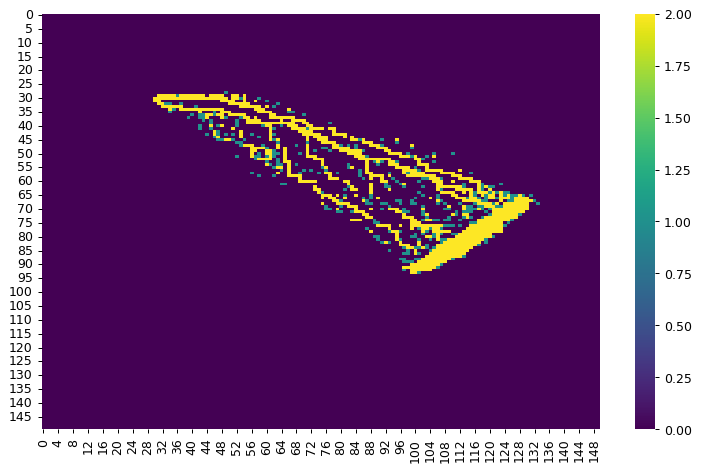

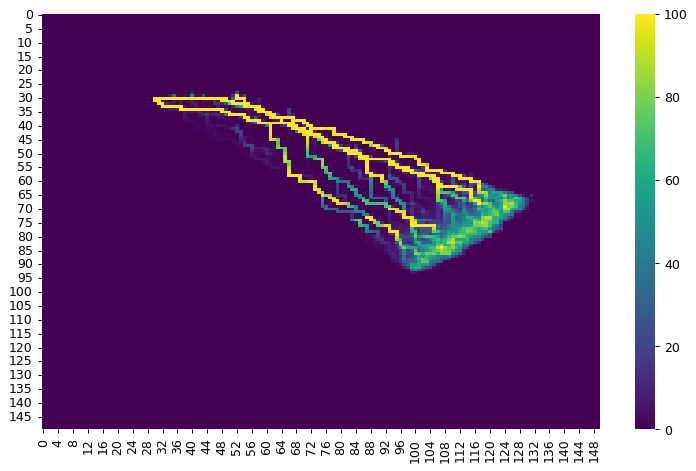

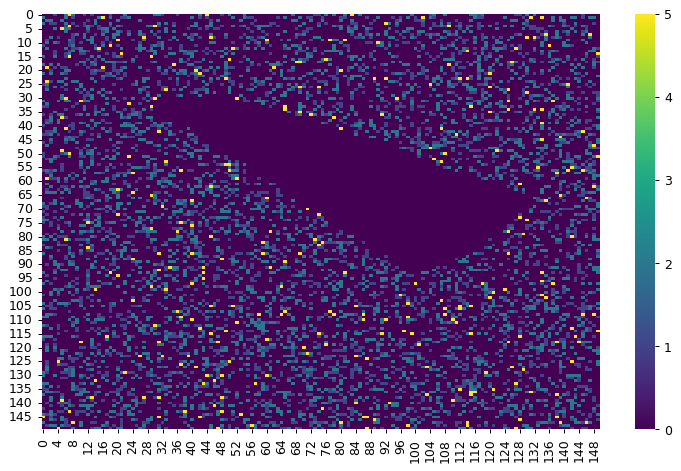

In [11]:
nodes, node_array = create_nodes(n=22500,evaporation_rate=1/30)
print(node_array[30,30])
# visualise_food(nodes)
new_nodes = model(nodes=nodes,steps=750,ants_per_step=10,max_ants=7500)

plt.figure(figsize=(10,6),dpi=90)
visualise_all(new_nodes,22500,on=True,annot=False,max_value=2) # False == Pheromones, True == Capacity
plt.figure(figsize=(10,6),dpi=90)
visualise_all(new_nodes,22500,on=False,annot=False,max_value=100) # False == Pheromones, True == Capacity
plt.figure(figsize=(10,6),dpi=90)
visualise_food(new_nodes,max_value=5)

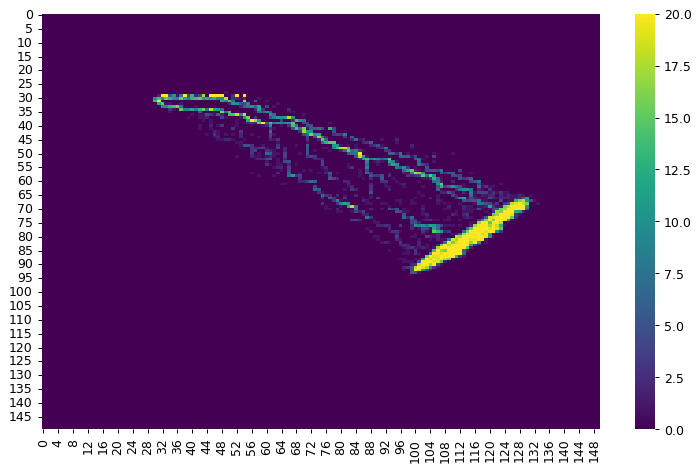

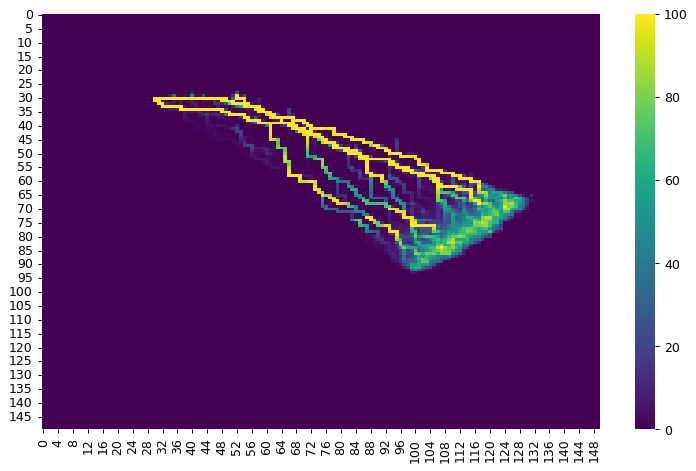

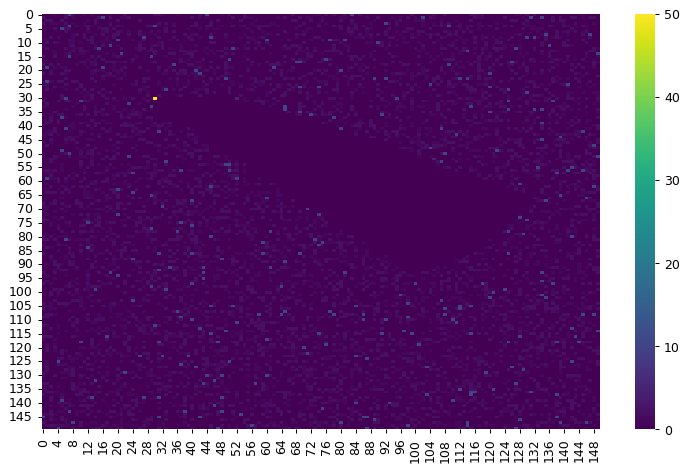

In [15]:
plt.figure(figsize=(10,6),dpi=90)
visualise_all(new_nodes,22500,on=True,annot=False,max_value=20) # False == Pheromones, True == Capacity
plt.figure(figsize=(10,6),dpi=90)
visualise_all(new_nodes,22500,on=False,annot=False,max_value=100) # False == Pheromones, True == Capacity
plt.figure(figsize=(10,6),dpi=90)
visualise_food(new_nodes,max_value=50)